In [ ]:
//Достаем модель из репозитория
var diagram = data.get("data/Collaboration/sysbio2025_Chupov/Data/HW1/CD95-NFkB_simple_model")

//Достаем таблицу из репозитория
var expData = data.get("data/Collaboration/sysbio2025_Chupov/Data/HW1/exp_data_1");

//Задаем сетку времени для расчетов
var span = se.createSpan(0, 150, 5);

var result = se.simulate(diagram, span);
var vals = result.getValues("$cell.C8star")

Code generation...
Done. Elapsed time: 0.26002108 seconds
Code compilation...
Done. Elapsed time: 0.51868283 seconds
Simulation...
Done. Elapsed time: 0.020872445 seconds


In [ ]:
vals

[0.0, 8.94367339536401E-4, 0.013450087772950937, 0.05346239339815275, 0.12757103926311325, 0.2341234775305061, 0.3675129252076716, 0.5211215542151977, 0.6887745656900752, 0.8652928938419079, 1.0465910628732296, 1.229576796536644, 1.4119838274349183, 1.5921993111714574, 1.769110963866326, 1.9419813730959379, 2.110348992970934, 2.2739522624397286, 2.432672524525296, 2.5864916691160724, 2.7354610321130943, 2.8796787608034164, 3.019273473459105, 3.154392558271168, 3.285193868981411, 3.411839893662584, 3.534493715345867, 3.6533162647012425, 3.7684644997197045, 3.8800902467124785, 3.9883395098635948]

In [ ]:
function getArray(tbl, columnName)
{
    var arr = [];
    for(var it = tbl.iterator(); it.hasNext();)
    {
        var row = it.next();
        arr.push(Number(row.getValue(columnName)));
    }
    return arr;
}

var casp8_exp = getArray(expData, "casp8")
var time_exp = getArray(expData, "time")

undefined

In [ ]:
//p43/p41:
//k2*$cell.DISC*$cell.C8 напрямую влияет на концентрацию pro8 и DISC, который напрямую влияет на p43/p41. слабо, но сильно влияет на динамику
//k5*$cell.DISCC8*$cell.C8 напрямую влияет на p43/p41. сильно
//k8*$cell.p43p41*$cell.p43p41 напрямую влияет на casp8, а он сильно влияет на p43/p41. сильно
//k11*$cell.C8star влияет напрямую на casp8. слабо, но сильно влияет на динамику

//casp8:
//k2*$cell.DISC*$cell.C8 напрямую влияет на концентрацию pro8 и DISC, который напрямую влияет на p43/p41. слабо, но сильно влияет на динамику
//k5*$cell.DISCC8*$cell.C8 напрямую влияет на p43/p41. сильно
//k8*$cell.p43p41*$cell.p43p41 напрямую влияет на casp8, а он влияет на p43/p41. сильно

//Прямое влияение на концентрацию:
//k5 влияет на p43/p41, потому что в схеме этот коэффицент моделирует реакцию перехода про-каспазы-8 в p43/p41
//k8 влияет на casp8, потому что в схеме этот коэффицент моделирует реакцию перехода p43/p41 в активированную каспазу-8
//Оба эти коэффицента влияют напрямую на образование p43/p41 и casp8 соответсвенно, а так же изменение p43/p41 напрямую влияет на casp8. Я думаю тут и так
//понятно почему у них такой сильный эффект.

//Влияение на динамику
//k2 влияет на сигналный комплекс DISC, он влияет на активацию эффекторных каспаз.
//Стоит упомянуть что эффективаная работа DISC зависит так же от концентрации прокаспаз-8, тот спад который мы видим в динамике p43/p41, может быть обусловлена
// быстрым расходованием субстрата (прокаспаза-8).


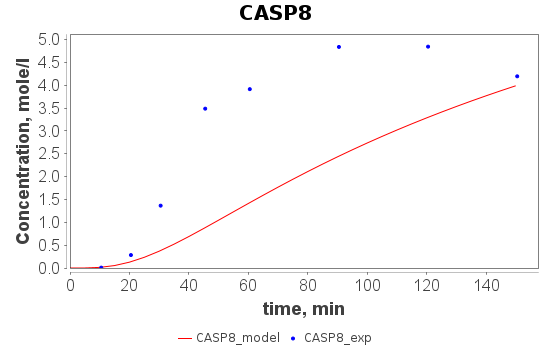

In [ ]:
//Устанавливаем полученные ранее оптимаоьные значения
//k1 5.0
//k11 1.0E-4
//k2 0.001
//k5 6.0E-4
//k8 1.0E-4
model.setInitialValue(diagram, "k1", 5.0);
model.setInitialValue(diagram, "k11", 1.0E-4);
model.setInitialValue(diagram, "k2", 0.001);
model.setInitialValue(diagram, "k5", 6.0E-4);
model.setInitialValue(diagram, "k8", 1.0E-4);

span = se.createSpan(0, 160, 1);
var res = se.simulate(diagram, span);
pm.createPlot("CASP8", "time, min", "Concentration, mole/l");
pm.addCurve("CASP8_model", result, "$cell.C8star", "time", pm.createPen(1, "red", "-"));
pm.addExperiment("CASP8_exp", expData, "casp8", "time", pm.createPen(1, "blue", "-"));
pm.showPlot();


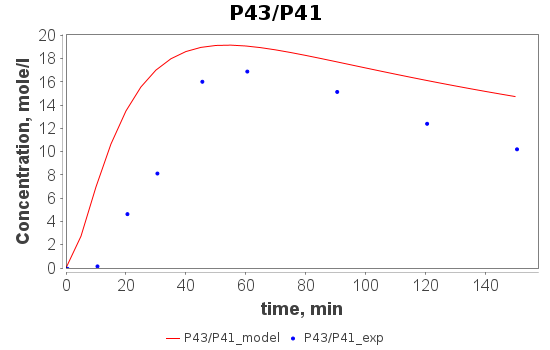

In [ ]:
pm.createPlot("P43/P41", "time, min", "Concentration, mole/l");
pm.addCurve("P43/P41_model", result, "$cell.p43p41", "time", pm.createPen(1, "red", "-"));
pm.addExperiment("P43/P41_exp", expData, "p43p41", "time", pm.createPen(1, "blue", "-"));
pm.showPlot();
//Лучше смотрите через simulation document там графики выглядят лучше.

In [ ]:
span = se.createSpan(0, 150, 5);

//Наиболее влиятельные параметры на casp8
var k8_lowerBoundary = 6E-4;
var k8_upperBoundary = 8E-4;

var k2_lowerBoundary = 1E-3;
var k2_upperBoundary = 2E-2;

var RMSEs = [];
var k8s = [];
var k2s = [];

var RMSEs = ["RMSE"];
var k8s = ["k8"];
var k2s = ["k2"];
for (i=0; i<10; i++){
    var k8 = k8_lowerBoundary + (k8_upperBoundary - k8_lowerBoundary) * java.lang.Math.random();
    k8s[i+1] = k8;
    var k2 = k2_lowerBoundary + (k2_upperBoundary - k2_lowerBoundary) * java.lang.Math.random();
    k2s[i+1] = k2;

    model.setInitialValue(diagram, "k8", k8);
    model.setInitialValue(diagram, "k2", k2);

    var result = se.simulate(diagram, span);
    var vals = result.getValues("$cell.C8star");

    var squareSums = 0.0;
    var n = 0;
    for(j=0.0; j<125.0; j+=5.0){
        var index_time = time_exp.indexOf(j);
        if(index_time > -1){
            var exp_val = casp8_exp[index_time];
            var mod_val = vals[index_time];

            squareSums += java.lang.Math.abs(java.lang.Math.pow(mod_val, 2) - java.lang.Math.pow(exp_val, 2));
            n += 1;
        }
    }

    RMSEs[i+1] = java.lang.Math.sqrt(squareSums / n);
    //RMSEs.push(java.lang.Math.sqrt(squareSums / n));
}

Code generation...
Done. Elapsed time: 0.013883935 seconds
Code compilation...
Done. Elapsed time: 0.021308642 seconds
Simulation...
Done. Elapsed time: 0.003730389 seconds
Code generation...
Done. Elapsed time: 0.008296432 seconds
Code compilation...
Done. Elapsed time: 0.016216504 seconds
Simulation...
Done. Elapsed time: 0.003490212 seconds
Code generation...
Done. Elapsed time: 0.007354035 seconds
Code compilation...
Done. Elapsed time: 0.015102731 seconds
Simulation...
Done. Elapsed time: 0.003126541 seconds
Code generation...
Done. Elapsed time: 0.009124776 seconds
Code compilation...
Done. Elapsed time: 0.014888885 seconds
Simulation...
Done. Elapsed time: 0.003124462 seconds
Code generation...
Done. Elapsed time: 0.007252292 seconds
Code compilation...
Done. Elapsed time: 0.020472948 seconds
Simulation...
Done. Elapsed time: 0.003292206 seconds
Code generation...
Done. Elapsed time: 0.008644643 seconds
Code compilation...
Done. Elapsed time: 0.015037479 seconds
Simulation...
Do

In [ ]:
var htmlTable = html.createTable();
htmlTable.addRow(k8s);
htmlTable.addRow(k2s);
htmlTable.addRow(RMSEs);

htmlTable.out();

k8,7.342703083095834E-4,7.018288404473493E-4,7.632044506228292E-4,7.816080117351385E-4,6.325700562650742E-4,6.876335536433907E-4,6.95014369470407E-4,7.217733917347635E-4,7.014151834774663E-4,7.799376073645582E-4
k2,0.017635808089809208,0.013130941858109823,0.017321306053877165,0.012744776015967973,0.010073700166840775,0.01261818453014146,0.0057506437307510445,0.01783392450025247,0.0025127239542667434,0.006892471114653928
RMSE,3.1117044759560324,3.1092345682757916,3.1114560368125503,3.107847589569391,3.1056040497223316,3.108846946234762,3.072264719811094,3.1118231626368766,2.9028445888346504,3.0817036986427757


In [ ]:
//При данных диапазонах k8 [6E-4, 8E-4] и k2 [1E-3, 2E-2] RMSE находиться в приемлимы значениях, а значит данные диапазоны подходят для воспроизведения эксперементальных данных.